Create adjacency matrix using Delaunay and Linear programming algorithm
The number of points is fixed and equal to 30
The number of dimensions increases at each loop (from 2 to 14)

Ndims:  2


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


exTimeDel:  0.005025148391723633
exTimeLp:  6.103792667388916
Ndims:  3
exTimeDel:  0.010841608047485352
exTimeLp:  12.131292581558228
Ndims:  4
exTimeDel:  0.03429746627807617
exTimeLp:  8.777485132217407
Ndims:  5
exTimeDel:  0.06529617309570312
exTimeLp:  5.390150308609009
Ndims:  6
exTimeDel:  0.16279077529907227
exTimeLp:  5.057729005813599
Ndims:  7
exTimeDel:  0.566291093826294
exTimeLp:  4.767972230911255
Ndims:  8
exTimeDel:  1.5139403343200684
exTimeLp:  4.534120559692383
Ndims:  9
exTimeDel:  3.5551609992980957
exTimeLp:  4.293547630310059
Ndims:  10
exTimeDel:  6.63666033744812
exTimeLp:  4.2710254192352295
Ndims:  11
exTimeDel:  14.293522834777832
exTimeLp:  4.215446472167969
Ndims:  12
exTimeDel:  25.446513652801514
exTimeLp:  4.208392381668091
Ndims:  13
exTimeDel:  37.591975688934326
exTimeLp:  3.9998998641967773
Ndims:  14
exTimeDel:  61.381049156188965
exTimeLp:  4.217352390289307


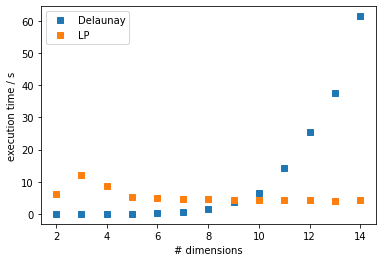

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import scipy.sparse
import itertools
import time
from scipy.optimize import linprog


Npoints = 30
xmin    = -1
xmax    =  1
ND      = 14
exTimeDel = np.zeros(ND)
exTimeLp  = np.zeros(ND)



for Ndims in np.arange(2, ND+1):
    print("Ndims: ", Ndims)
    points = np.random.uniform(xmin, xmax, (Npoints, Ndims))
    
    ############################################################# Delaunay    
    start_time = time.time()

    tri    = Delaunay(points)
    A      = scipy.sparse.lil_matrix((Npoints, Npoints))

    for p in tri.vertices:
        for i,j in itertools.combinations(p,2):
            A[i,j] = 1
            A[j,i] = 1

    exTimeDel[Ndims-1] = time.time() - start_time
    
    Adel = A
    


    ############################################################## Linear Programming

    start_time = time.time()
    
    b   = np.sum(points**2, 1)

    a   = 2 * points
    a = np.c_[a, -np.ones(Npoints)]

    A      = scipy.sparse.lil_matrix((Npoints, Npoints))


    for i in np.arange(Npoints-1):

        #print("i: ",i)

        for j in np.arange(i+1, Npoints):
            b_tag       = np.copy(b)
            b_tag[j]    = b[j] + 1
            constraintA = np.r_[a, [-a[i,:]] ]
            constraintB = np.r_[b_tag, [-b[i]] ]    
            sol         = linprog(-a[j,:], A_ub=constraintA, b_ub=constraintB, bounds=(None,None),method='interior-point',  options = {"lstsq":True})

            if sol.x.size > 0:
                f           = b[j] - np.sum(a[j,:]*sol.x)
                if f < 0:          
                    A[i,j] = 1
                    A[j,i] = 1
    
    
    exTimeLp[Ndims-1] = time.time() - start_time
    
    Alp = A
    
    print("exTimeDel: ", exTimeDel[Ndims-1])
    print("exTimeLp: ", exTimeLp[Ndims-1])    


plt.plot(np.arange(2, ND+1), exTimeDel[1:], 's', label="Delaunay")
plt.plot(np.arange(2, ND+1), exTimeLp[1:], 's',  label="LP")
plt.xlabel("# dimensions")
plt.ylabel("execution time / s")
plt.legend()
